In [2]:
import numpy as np
import random

import matplotlib.pyplot as plt

# logistic regression

- Equations: https://www.baeldung.com/cs/gradient-descent-logistic-regression
- Implementation: https://www.askpython.com/python/examples/logistic-regression-from-scratch

In [28]:
dataset = [
    [2.7810836, 2.550537003,0],
    [1.465489372, 2.362125076,0],
    [3.396561688, 4.400293529,0],
    [1.38807019, 1.850220317,0],
    [3.06407232, 3.005305973,0],
    [7.627531214, 2.759262235,1],
    [5.332441248, 2.088626775,1],
    [6.922596716, 1.77106367,1],
    [8.675418651, -0.242068655,1],
    [7.673756466, 3.508563011,1]
]

In [55]:
# training data
x = np.array(dataset)[:, :2]
y = np.array(dataset)[:, -1]
print(x)
print(y)

[[ 2.7810836   2.550537  ]
 [ 1.46548937  2.36212508]
 [ 3.39656169  4.40029353]
 [ 1.38807019  1.85022032]
 [ 3.06407232  3.00530597]
 [ 7.62753121  2.75926224]
 [ 5.33244125  2.08862677]
 [ 6.92259672  1.77106367]
 [ 8.67541865 -0.24206865]
 [ 7.67375647  3.50856301]]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [56]:
# incorporate into weights by add ones into x
b = np.ones((x.shape[0], 1))  
x = np.concatenate((b, x), axis=1)
print(x)

# weights
w = np.random.rand(x.shape[1])
print(w)

[[ 1.          2.7810836   2.550537  ]
 [ 1.          1.46548937  2.36212508]
 [ 1.          3.39656169  4.40029353]
 [ 1.          1.38807019  1.85022032]
 [ 1.          3.06407232  3.00530597]
 [ 1.          7.62753121  2.75926224]
 [ 1.          5.33244125  2.08862677]
 [ 1.          6.92259672  1.77106367]
 [ 1.          8.67541865 -0.24206865]
 [ 1.          7.67375647  3.50856301]]
[0.32693773 0.24768896 0.04870533]


In [59]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


def gradient_descent(x, y, y_pred):
    return np.dot((y_pred - y), x)/x.shape[0]


def loss(y, y_pred):
    return (- y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()   

In [61]:
learning_rate = 0.1
niter = 10

i = 0
while i <= niter:
    y_pred = sigmoid(np.dot(x, w))
    l = loss(y, y_pred)
    print(i, l)
    
    w +=  - learning_rate * gradient_descent(x, y, y_pred)
    
    i += 1
    

0 0.00041302308562396006
1 0.00041300894429313585
2 0.00041299480394027066
3 0.00041298066456520904
4 0.0004129665261678731
5 0.0004129523887481736
6 0.00041293825230598834
7 0.00041292411684118387
8 0.0004129099823537154
9 0.0004128958488434831
10 0.0004128817163103199


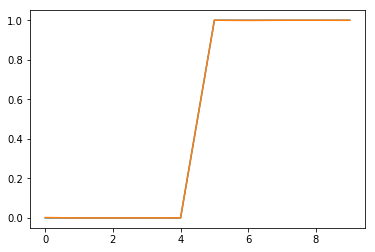

In [65]:
plt.plot(range(y.shape[0]), y)
plt.plot(range(y.shape[0]), y_pred)
plt.show()

# k means

https://github.com/jinmeiz/ML-From-Scratch/blob/master/mlfromscratch/unsupervised_learning/k_means.py


In [5]:
X = np.array(
    [[24.412, 32.932], [35.190, 12.189], [26.288, 41.718], 
     [0.376, 15.506], [26.116, 3.963]]
)
X.shape


(5, 2)

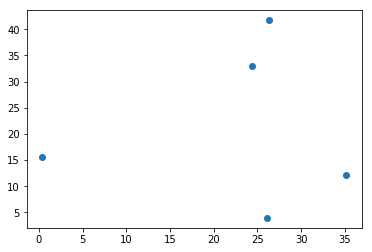

In [59]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [77]:
def init_random_centroids(X, k):
    n_samples, n_features = X.shape[0], X.shape[1]
    print(n_samples, n_features )
    centroids = np.zeros((k, n_features))
    
    random_idx_lst = random.sample(range(0, 5), 3)
    print()
    for i, random_idx in enumerate(random_idx_lst):
        centroids[i] = X[random_idx]
    
    return centroids


def euclidean_distance(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())


def closest_centroid(point, centroids):
    closest_i = 0
    closest_dist = float('inf')
    
    for i, centroid in enumerate(centroids):
        dist = euclidean_distance(point, centroid)
        if dist < closest_dist:
            closest_i = i
            closest_dist = dist
    return closest_i
        

def assign_clusters(X, centroids, k):
    
    clusters = [[] for i in range(k)]
    for point in X:
        centroid = closest_centroid(point, centroids)
        clusters[centroid].append(point.tolist())
    
    return clusters


def calculate_centroids(clusters):
    
    centroids = [[] for i in range(k)]
    for i, cluster in enumerate(clusters):
        centroids[i] = np.array(cluster).mean(axis=0)    
    print(centroids)
    return centroids


k = 3

# initialize centroids as k random samples from X
centroids = init_random_centroids(X, k)
# print('initial centroid:\n', centroids)

max_iterations = 3
i = 0
while i < max_iterations:
    # assign samples to closest centroids (create clusters)
    clusters = assign_clusters(X, centroids, k)
    new_centroids = calculate_centroids(clusters)
    print(i, clusters)
#     print(centroids)
    
    diff = np.array(centroids) - np.array(new_centroids)
    if not diff.any():
        break
    centroids = new_centroids
                
    i += 1

5 2

[array([25.35 , 37.325]), array([13.246 ,  9.7345]), array([35.19 , 12.189])]
0 [[[24.412, 32.932], [26.288, 41.718]], [[0.376, 15.506], [26.116, 3.963]], [[35.19, 12.189]]]
[array([25.35 , 37.325]), array([ 0.376, 15.506]), array([30.653,  8.076])]
1 [[[24.412, 32.932], [26.288, 41.718]], [[0.376, 15.506]], [[35.19, 12.189], [26.116, 3.963]]]
[array([25.35 , 37.325]), array([ 0.376, 15.506]), array([30.653,  8.076])]
2 [[[24.412, 32.932], [26.288, 41.718]], [[0.376, 15.506]], [[35.19, 12.189], [26.116, 3.963]]]
